#Distance Regression


In [ ]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
from tensorflow import keras



sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


##Load Data

In [ ]:
#connect google drive to this colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load data file
data = pd.read_csv('/content/gdrive/MyDrive/Group_03_3rd Module/Studio/Colab Notebooks/ML_train.csv')
print(data)

       NODES X CO  NODES Y CO  EMPTY SPACE ID   DISTANCE
0       36.790779   -1.316243               7  15.802902
1       36.790542   -1.314240             135  28.235236
2       36.790345   -1.315294              50   2.171157
3       36.791030   -1.315581              83  10.571200
4       36.790145   -1.314685              76  17.714244
...           ...         ...             ...        ...
28382   36.797496   -1.318706             426  21.956631
28383   36.799541   -1.317952             669  22.000700
28384   36.799267   -1.318336             608  21.899325
28385   36.799231   -1.318126             608  18.998210
28386   36.798544   -1.318894             493  19.058002

[28387 rows x 4 columns]


In [ ]:
data.columns = ['x', 'y', 'id', "dis"]
data.head(15)

,x,y,id,dis
0,36.790779,-1.316243,7,15.802902
1,36.790542,-1.314240,135,28.235236
2,36.790345,-1.315294,50,2.171157
3,36.791030,-1.315581,83,10.571200
4,36.790145,-1.314685,76,17.714244
5,36.791270,-1.316084,75,12.131325
6,36.790638,-1.314673,153,13.037382
7,36.790436,-1.315748,38,14.517786
8,36.790761,-1.315133,92,17.625736
9,36.790490,-1.316029,1,20.307557


**DISTANCE REGRESSION**

In [ ]:
#same code as last time

#declare features
X = data[["x", "y", "id"]]

# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

# Apply the scaler to our X-features
X_scaled = scalerX.fit_transform(X)

#save the scaler for later use
from sklearn.externals import joblib
scaler_filename = "scalerX_regression.save"
joblib.dump(scalerX, scaler_filename) 
#print(X_scaled.shape)


#declare regression target
y = data.loc[:,"dis"].to_numpy()


y = y.reshape(-1, 1)
print(y.shape)
from sklearn.preprocessing import MinMaxScaler
scalerY = MinMaxScaler()


#In this case it makes sense to use MinMax scaling because the wage seems like a relative range
# Apply the scaler to our Y-features
y_scaled = scalerY.fit_transform(y)
scaler_filename = "scalerY_regression.save"
joblib.dump(scalerY, scaler_filename) 
#print(X_scaled.shape)

print(y_scaled.shape)

(28387, 1)
(28387, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 21)

In [ ]:
#visualize our data
#we can see that scikitlearn doesnt care if it is a dataframe or a numpy array, because they all function on the same way 
print("TRAIN", "input", X_train.shape, "output", y_train.shape)
print("TEST", "input", X_test.shape, "output", y_test.shape)

TRAIN input (22709, 3) output (22709, 1)
TEST input (5678, 3) output (5678, 1)


In [ ]:
# Instantiate a sequential model
model = tf.keras.models.Sequential()
n_cols = X_scaled.shape[1]  

# Add 2 dense layers of 50 and 32 neurons each
model.add(tf.keras.layers.Dense(512, input_shape=(n_cols,), activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
  
# Add a dense layer with 1 value output
model.add(tf.keras.layers.Dense(1, activation= "sigmoid"))
  
# Compile your model 
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [ ]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data
history = model.fit(X_train,y_train,epochs=200, validation_split=0.2)

Epoch 1/200
568/568 [==============================] - 4s 2ms/step - loss: 0.0185 - val_loss: 0.0172
Epoch 2/200
568/568 [==============================] - 1s 2ms/step - loss: 0.0166 - val_loss: 0.0166
Epoch 3/200
568/568 [==============================] - 1s 3ms/step - loss: 0.0157 - val_loss: 0.0152
Epoch 4/200
568/568 [==============================] - 1s 2ms/step - loss: 0.0141 - val_loss: 0.0135
Epoch 5/200
568/568 [==============================] - 1s 3ms/step - loss: 0.0129 - val_loss: 0.0128
Epoch 6/200
568/568 [==============================] - 1s 2ms/step - loss: 0.0123 - val_loss: 0.0125
Epoch 7/200
568/568 [==============================] - 1s 2ms/step - loss: 0.0117 - val_loss: 0.0121
Epoch 8/200
568/568 [==============================] - 1s 2ms/step - loss: 0.0114 - val_loss: 0.0112
Epoch 9/200
568/568 [==============================] - 1s 2ms/step - loss: 0.0112 - val_loss: 0.0108
Epoch 10/200
568/568 [==============================] - 1s 2ms/step - loss: 0.0109 - val_lo

In [ ]:
import matplotlib.pyplot as plt

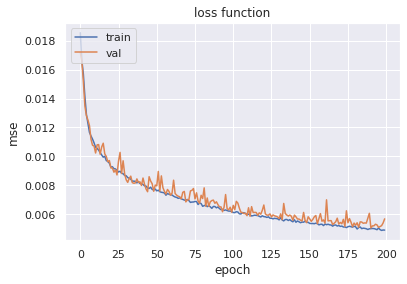

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Evaluate your model accuracy on the test data
loss_test = model.evaluate(X_test,y_test)

# Print accuracy
print('mse_test:', loss_test)

178/178 [==============================] - 0s 1ms/step - loss: 0.0055
mse_test: 0.005461586639285088


In [ ]:
model.save('STUDIO-ML_REGRESSION_MODEL_V1.h5')

In [ ]:
def plot_comparison(x_val, pred, truth, xlab, ylab):
  fig, ax1 = plt.subplots()
  ax1.plot(x_val, truth, color = "red", label = "truth",linestyle='None', marker = "o", markersize = 5)
  ax1.plot(x_val, pred, color = "blue", label = "pred",linestyle='None', marker = "o", markersize = 4, alpha = 0.5)

  ax1.set_xlabel(xlab)
  ax1.set_ylabel(ylab)
  ax1.legend()
  fig.set_figheight(10)
  fig.set_figwidth(20)
  plt.title('Prediction Comparison')
  plt.show()

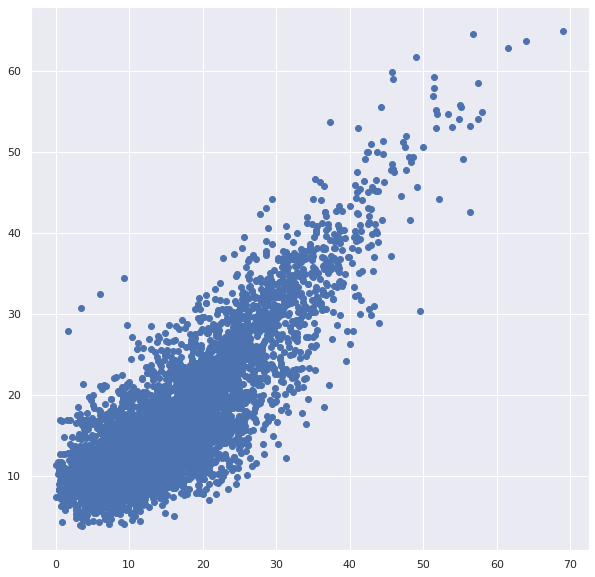

In [ ]:
y_pred = scalerY.inverse_transform(model.predict(X_test))
y_truth = scalerY.inverse_transform(y_test)

plt.scatter(y_truth,y_pred)